In [1]:
# Import yfinance library
import yfinance as yf
import pandas as pd
import numpy as np
import hvplot.pandas
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()
sp500_tickers[1:10]

['AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

In [3]:
# Filter out Class B shares that have a '.B' in the ticker name
sp500_tickers = [ticker for ticker in sp500_tickers if '.B' not in ticker]

In [4]:
# Define the start and end dates  
start_date = '2000-01-01'
end_date   = '2024-05-01'

# Define the list of tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# Filter out Class B shares that have a '.B' in the ticker name
sp500_tickers = [ticker for ticker in sp500_tickers if '.B' not in ticker]

# Download historical prices for the list of tickers
historical_prices = yf.download(sp500_tickers, start=start_date, end=end_date)

historical_prices.head()

[*********************100%%**********************]  501 of 501 completed


Price      Adj Close                                                         \
Ticker             A AAL   AAPL ABBV ABNB    ABT   ACGL ACN    ADBE     ADI   
Date                                                                          
2000-01-03   43.6130 NaN 0.8450  NaN  NaN 8.9928 1.2778 NaN 16.2747 28.4383   
2000-01-04   40.2815 NaN 0.7737  NaN  NaN 8.7359 1.2708 NaN 14.9094 26.9996   
2000-01-05   37.7828 NaN 0.7851  NaN  NaN 8.7199 1.3889 NaN 15.2042 27.3938   
2000-01-06   36.3442 NaN 0.7171  NaN  NaN 9.0250 1.3750 NaN 15.3283 26.6449   
2000-01-07   39.3729 NaN 0.7511  NaN  NaN 9.1213 1.4514 NaN 16.0730 27.3938   

Price       ... Volume                                                    \
Ticker      ...    WTW       WY WYNN      XEL       XOM XYL      YUM ZBH   
Date        ...                                                            
2000-01-03  ...    NaN   973700  NaN  2738600  13458200 NaN  3033493 NaN   
2000-01-04  ...    NaN  1201700  NaN   425200  14510800 NaN  3315031 NaN   
2000-01-05  ...    NaN  1184600  NaN   500200  17485000 NaN  4642602 NaN   
2000-01-06  ...    NaN  1307700  NaN   344100  19461600 NaN  3947658 NaN   
2000-01-07  ...    NaN  1728000  NaN   469500  16603800 NaN  6063647 NaN   

Price                    
Ticker         ZBRA ZTS  
Date                     
2000-01-03  1055700 NaN  
2000-01-04   522450 NaN  
2000-01-05   612225 NaN  
2000-01-06   263925 NaN  
2000-01-07   333900 NaN  

[5 rows x 3006 columns]

In [5]:
# Filter and keep only columns where the first level of the MultiIndex is 'Adj Close'
historical_prices  = historical_prices.loc[:, historical_prices.columns.get_level_values(0) == 'Adj Close']
historical_prices.head()

Price      Adj Close                                                         \
Ticker             A AAL   AAPL ABBV ABNB    ABT   ACGL ACN    ADBE     ADI   
Date                                                                          
2000-01-03   43.6130 NaN 0.8450  NaN  NaN 8.9928 1.2778 NaN 16.2747 28.4383   
2000-01-04   40.2815 NaN 0.7737  NaN  NaN 8.7359 1.2708 NaN 14.9094 26.9996   
2000-01-05   37.7828 NaN 0.7851  NaN  NaN 8.7199 1.3889 NaN 15.2042 27.3938   
2000-01-06   36.3442 NaN 0.7171  NaN  NaN 9.0250 1.3750 NaN 15.3283 26.6449   
2000-01-07   39.3729 NaN 0.7511  NaN  NaN 9.1213 1.4514 NaN 16.0730 27.3938   

Price       ...                                                             
Ticker      ... WTW      WY WYNN    XEL     XOM XYL    YUM ZBH    ZBRA ZTS  
Date        ...                                                             
2000-01-03  ... NaN 11.5053  NaN 6.9780 18.1810 NaN 4.6574 NaN 25.0278 NaN  
2000-01-04  ... NaN 11.0731  NaN 7.1387 17.8328 NaN 4.5638 NaN 24.6667 NaN  
2000-01-05  ... NaN 11.6597  NaN 7.4141 18.8049 NaN 4.5872 NaN 25.1389 NaN  
2000-01-06  ... NaN 12.2051  NaN 7.3453 19.7771 NaN 4.5482 NaN 23.7778 NaN  
2000-01-07  ... NaN 11.8038  NaN 7.3453 19.7191 NaN 4.4468 NaN 23.5139 NaN  

[5 rows x 501 columns]

In [6]:
# Remove the MultiIndex and keep only the second level
historical_prices.columns = historical_prices.columns.droplevel(0)   
historical_prices.head()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,43.6130,NaN,0.8450,NaN,NaN,8.9928,1.2778,NaN,16.2747,28.4383,...,NaN,11.5053,NaN,6.9780,18.1810,NaN,4.6574,NaN,25.0278,NaN
2000-01-04,40.2815,NaN,0.7737,NaN,NaN,8.7359,1.2708,NaN,14.9094,26.9996,...,NaN,11.0731,NaN,7.1387,17.8328,NaN,4.5638,NaN,24.6667,NaN
2000-01-05,37.7828,NaN,0.7851,NaN,NaN,8.7199,1.3889,NaN,15.2042,27.3938,...,NaN,11.6597,NaN,7.4141,18.8049,NaN,4.5872,NaN,25.1389,NaN
2000-01-06,36.3442,NaN,0.7171,NaN,NaN,9.0250,1.3750,NaN,15.3283,26.6449,...,NaN,12.2051,NaN,7.3453,19.7771,NaN,4.5482,NaN,23.7778,NaN
2000-01-07,39.3729,NaN,0.7511,NaN,NaN,9.1213,1.4514,NaN,16.0730,27.3938,...,NaN,11.8038,NaN,7.3453,19.7191,NaN,4.4468,NaN,23.5139,NaN


In [7]:
MIN_REQUIRED_NUM_OBS_PER_TICKER = 100
# Count non-missing values for each ticker
ticker_counts = historical_prices.count()
ticker_counts

Ticker
A       6120
AAL     4679
AAPL    6120
ABBV    2851
ABNB     851
        ... 
XYL     3156
YUM     6120
ZBH     5727
ZBRA    6120
ZTS     2830
Length: 501, dtype: int64

In [8]:
# Filter out tickers with fewer than n=MIN_REQUIRED_NUM_OBS_PER_TICKER=100 non-missing values
valid_tickers_mask = ticker_counts[ticker_counts >= MIN_REQUIRED_NUM_OBS_PER_TICKER].index
valid_tickers_mask

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI',
       ...
       'WTW', 'WY', 'WYNN', 'XEL', 'XOM', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZTS'],
      dtype='object', name='Ticker', length=499)

In [9]:
# Filter the DataFrame based on valid tickers
historical_prices = historical_prices[valid_tickers_mask]

In [10]:
# Create a function called 'computingReturns' that takes prices and a list of integers (momentums) as an inputs
def computingReturns(prices, list_of_momentums): 
    # Initialize the forecast horizon
    forecast_horizon = 1
    # Compute forward returns by taking percentage change of close prices
    # and shifting by the forecast horizon
    f_returns = prices.pct_change(forecast_horizon, fill_method=None)
    f_returns = f_returns.shift(-forecast_horizon)
    # Convert the result to a DataFrame
    f_returns = pd.DataFrame(f_returns.unstack())
    # Name the column based on the forecast horizon
    name = "F_" + str(forecast_horizon) + "_d_returns"
    f_returns.rename(columns={0: name}, inplace=True)
    # Initialize total_returns with forward returns
    total_returns = f_returns
    
    # Iterate over the list of momentum values
    for i in list_of_momentums:   
        # Compute returns for each momentum value
        feature = prices.pct_change(i, fill_method=None)
        feature = pd.DataFrame(feature.unstack())
        # Name the column based on the momentum value
        name = str(i) + "_d_returns"        
        feature.rename(columns={0: name}, inplace=True)
        # Rename columns and reset index
        feature.rename(columns={0: name, 'level_0': 'Ticker'}, inplace=True)
        # Merge computed feature returns with total_returns based on Ticker and Date
        total_returns = pd.merge(total_returns, feature, left_index=True, right_index=True,how='outer')
    
    # Drop rows with any NaN values
    total_returns.dropna(axis=0, how='any', inplace=True) 

    # Return the computed total returns DataFrame
    return total_returns

In [12]:
# Create a list of momentums for 1d and 2d returns
list_of_momentums = [1,2]
# Run the function computingReturns and save the output as total_data
total_returns = computingReturns(historical_prices, list_of_momentums)
#Print the first 5 rows of total_data
total_returns.head()

F_1_d_returns  1_d_returns  2_d_returns
Ticker Date                                               
A      2000-01-05        -0.0381      -0.0620      -0.1337
       2000-01-06         0.0833      -0.0381      -0.0977
       2000-01-07         0.0606       0.0833       0.0421
       2000-01-10        -0.0136       0.0606       0.1490
       2000-01-11        -0.0202      -0.0136       0.0462

In [13]:
total_returns = total_returns.filter(items=['F_1_d_returns', '1_d_returns'])
total_returns.head()

F_1_d_returns  1_d_returns
Ticker Date                                  
A      2000-01-05        -0.0381      -0.0620
       2000-01-06         0.0833      -0.0381
       2000-01-07         0.0606       0.0833
       2000-01-10        -0.0136       0.0606
       2000-01-11        -0.0202      -0.0136

In [14]:
total_returns.index.get_level_values('Ticker').nunique()

499

In [15]:
total_returns.index.get_level_values('Date').value_counts().describe()

count   6117.0000
mean     443.9475
std       44.1428
min      355.0000
25%      409.0000
50%      449.0000
75%      485.0000
max      499.0000
Name: count, dtype: float64

In [16]:
# How many tickers do we have at each date?
tickers_per_date = total_returns.index.get_level_values('Date').value_counts()
tickers_per_date

Date
2024-04-29    499
2023-12-07    499
2023-12-18    499
2023-12-15    499
2023-12-14    499
             ... 
2000-01-26    355
2000-01-27    355
2000-01-28    355
2000-01-31    355
2000-01-05    355
Name: count, Length: 6117, dtype: int64

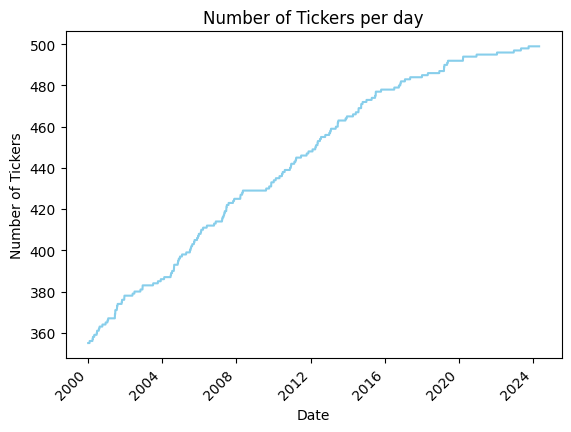

In [17]:
import matplotlib.pyplot as plt
tickers_per_date.plot(kind='line', color='skyblue')
plt.title('Number of Tickers per day')
plt.xlabel('Date')
plt.ylabel('Number of Tickers')
plt.xticks(rotation=45)
plt.show()

In [18]:
total_returns.describe()

,F_1_d_returns,1_d_returns
count,2715627.0000,2715627.0000
mean,0.0007,0.0007
std,0.0235,0.0235
min,-0.6805,-0.6805
25%,-0.0090,-0.0090
50%,0.0006,0.0006
75%,0.0102,0.0103
max,1.0236,1.0236


In [25]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean_bm  = pd.DataFrame(total_returns.loc[:,'F_1_d_returns'].groupby(level='Date').mean())
daily_mean_bm.rename(columns={'F_1_d_returns':'SP&500'}, inplace=True)

# Convert daily returns to cumulative returns
cum_returns_bm = pd.DataFrame((daily_mean_bm[['SP&500']]+1).cumprod())
#cum_returns_bm.rename(columns={'F_1_d_returns':'SP&500'}, inplace=True)

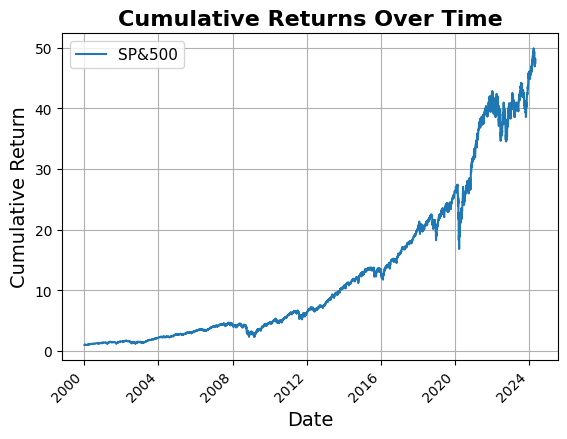

In [28]:
# Plotting the cumulative returns
cum_returns_bm.plot()

# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

In [29]:
# Calculate the number of years in the dataset
number_of_years = len(daily_mean_bm) / 252  # Assuming 252 trading days in a year

In [30]:
ending_value    = cum_returns_bm['SP&500'].iloc[-1]
beginning_value = cum_returns_bm['SP&500'].iloc[1]

In [31]:
# Compute the Compound Annual Growth Rate (CAGR)
ratio = ending_value/beginning_value
cagr = round((ratio**(1/number_of_years)-1)*100,2)
print(f'The CAGR is: {cagr}%')

The CAGR is: 17.08%


In [32]:
daily_mean_bm[['SP&500']].describe()

,SP&500
count,6117.0000
mean,0.0007
std,0.0129
min,-0.1272
25%,-0.0048
50%,0.0011
75%,0.0067
max,0.1148


In [33]:
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return    = daily_mean_bm[['SP&500']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean_bm[['SP&500']].describe().iloc[2,:] * pow(252,1/2)

In [34]:
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return    = daily_mean_bm[['SP&500']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean_bm[['SP&500']].describe().iloc[2,:] * pow(252,1/2)

sharpe  = average_daily_return/stand_dev_dail_return

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

Sharpe Ratio of Strategy: 0.88


In [38]:
#df_daily_mean.rename(columns={target:'Strategy'},inplace=True)
ann_returns = (pd.DataFrame((daily_mean_bm[['SP&500']]+1).groupby(daily_mean_bm.index.get_level_values(0).year).cumprod())-1)*100
calendar_returns_bm  = pd.DataFrame(ann_returns['SP&500'].groupby(daily_mean_bm.index.get_level_values(0).year).last())

In [39]:
calendar_returns_bm.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

:Bars   [Date]   (SP&500)

In [41]:
# Create a function to calculate RSI using returns
def calculate_rsi(returns, window=14):    
    gain = returns[returns>0].dropna().rolling(window=window).mean()    
    gain.name = 'gain'
    loss = returns[returns<0].dropna().rolling(window=window).mean()    
    loss.name = 'loss'
    returns = pd.merge(returns, gain, left_index=True, right_index=True, how='left')    
    returns = pd.merge(returns, loss, left_index=True, right_index=True, how='left')
    returns = returns.ffill()
    returns.dropna(inplace=True)
    ratio = returns['gain']/abs(returns['loss'])
    rsi = 100 - (100 / (1 + ratio))
    return rsi

In [43]:
# Calculate RSI for each ticker separately and add to the DataFrame
total_returns['RSI'] = total_returns.groupby('Ticker')[['1_d_returns']].transform(calculate_rsi)

In [47]:
total_returns[['RSI']].describe()

,RSI
count,2698841.0000
mean,50.9741
std,8.4158
min,8.0070
25%,45.2492
50%,50.9500
75%,56.6613
max,89.2620


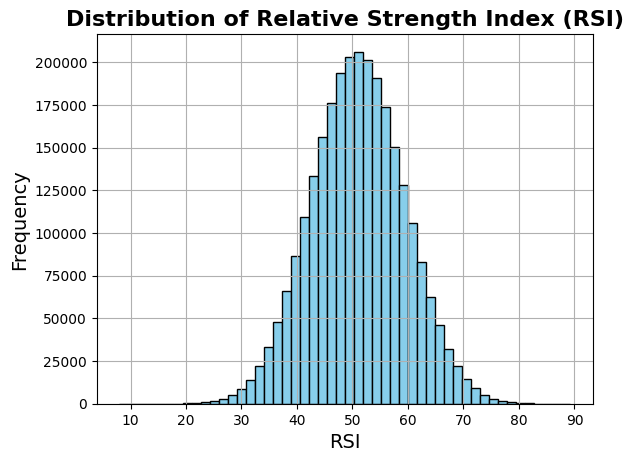

In [48]:
# Customizing the histogram
histogram_plot = total_returns[['RSI']].hist(bins=50, ax=plt.gca(), color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Relative Strength Index (RSI)', fontsize=16, fontweight='bold')
plt.xlabel('RSI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)  # Turn off gridlines for histograms

# Displaying the plot
plt.show()

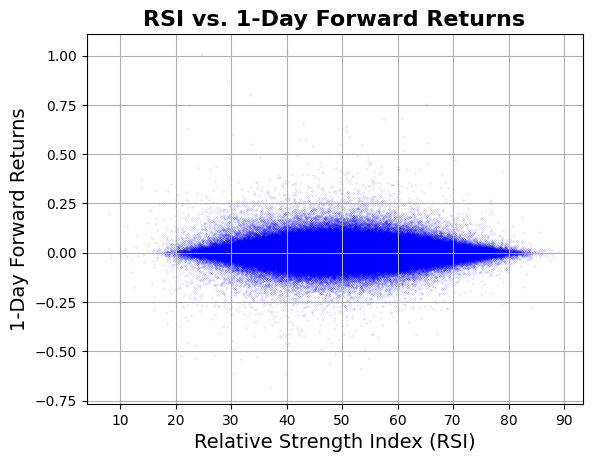

In [49]:
scatter_plot = total_returns.plot.scatter(x='RSI', y='F_1_d_returns', ax=plt.gca(), color='blue', alpha=0.6,s=0.01)

# Adding titles and labels
plt.title('RSI vs. 1-Day Forward Returns', fontsize=16, fontweight='bold')
plt.xlabel('Relative Strength Index (RSI)', fontsize=14)
plt.ylabel('1-Day Forward Returns', fontsize=14)
plt.grid(True)

# Displaying the plot
#plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

In [50]:
total_returns[['F_1_d_returns', 'RSI']].corr().style.background_gradient()

,F_1_d_returns,RSI
F_1_d_returns,1.000000,-0.004215
RSI,-0.004215,1.000000


<Axes: xlabel='Quantiles'>

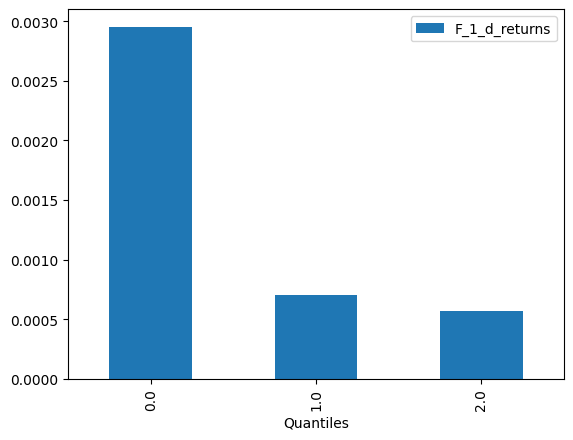

In [51]:
feature = 'RSI'
target = 'F_1_d_returns'

# Specify custom bin boundaries
bin_boundaries = [0, 30, 70, 100]

total_returns['Quantiles'] = total_returns.groupby(level='Date')[feature].transform(lambda x: pd.cut(x, bins=bin_boundaries, labels=False, precision=0, duplicates='drop'))

total_returns.groupby('Quantiles')[[target]].mean().plot(kind='bar', legend=True)

## Beginning Lesson 2

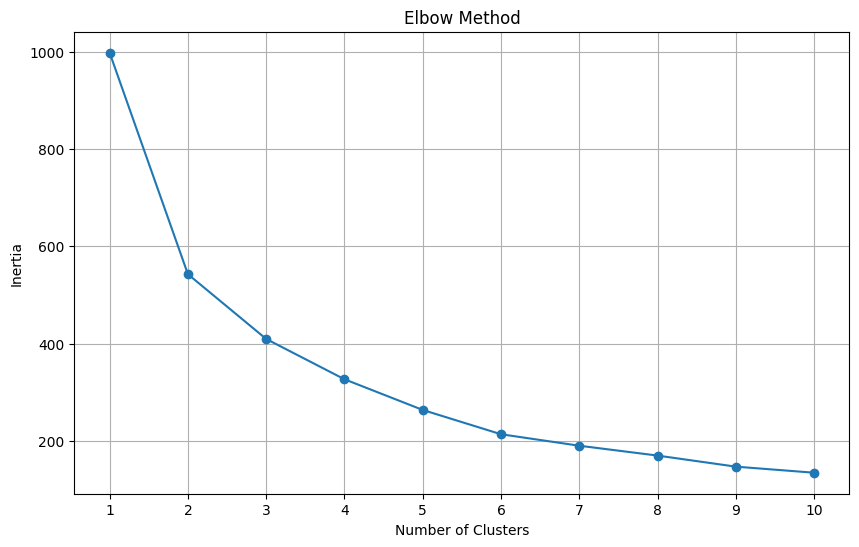

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

# Assuming you have a DataFrame 'df' with 'Date', 'Ticker', and 'F_1_d_returns' columns
# Group by Ticker and calculate average return and standard deviation
ticker_stats = total_returns.groupby('Ticker')['F_1_d_returns'].agg(['mean', 'std'])

# Standardize the data
scaler = StandardScaler()
ticker_stats_scaled = scaler.fit_transform(ticker_stats[['mean', 'std']])


# Set the OMP_NUM_THREADS environment variable to avoid memory leak
#os.environ["OMP_NUM_THREADS"] = "2"

# Initialize list to store inertias
inertias = []

# Test different numbers of clusters
for k in range(1, 11):    
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(ticker_stats_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Load S&P 500 returns data
total_returns = pd.read_csv('total_returns.csv')  # Assuming the data is stored in a CSV file


In [21]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
ticker_stats_scaled = scaler.fit_transform(ticker_stats)


In [22]:
from sklearn.cluster import KMeans

# Number of clusters (you can adjust this)
k = 5

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(ticker_stats_scaled)

# Add cluster labels to the original DataFrame
ticker_stats['Cluster'] = clusters

# Count the number of stocks in each cluster
cluster_counts = pd.Series(clusters).value_counts().sort_index()

# Inverse transform scaled mean and std to get the original data
cluster_centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=['mean', 'std'])
cluster_centers_df['Stocks Count'] = cluster_counts.values

# Print the clusters
print("Cluster Centers with Stock Count:")
print(cluster_centers_df)

C:\Users\cramk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
cluster_labels

array([3, 1, 2, ..., 1, 2, 4])

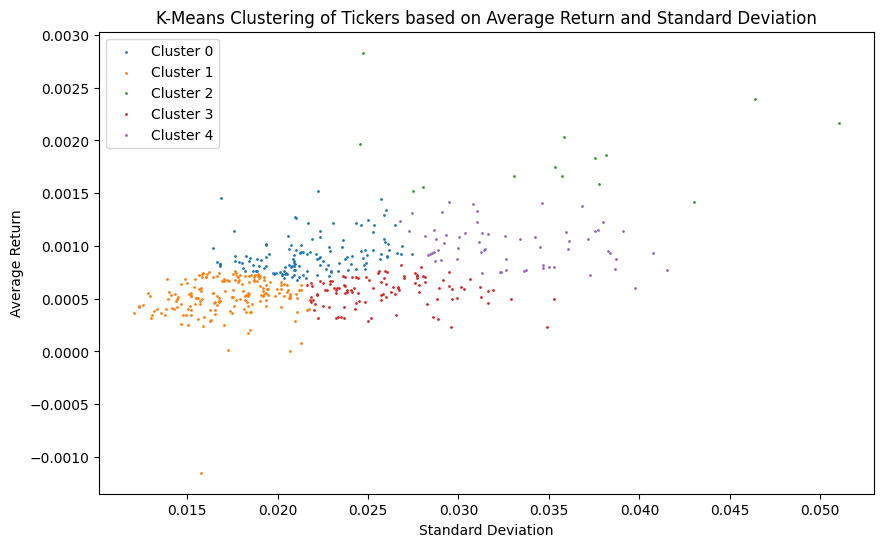

In [28]:
# Visualize the clusters
# (You may need to adjust this based on your visualization preferences)
plt.figure(figsize=(10, 6))
for cluster in range(k):
    plt.scatter(ticker_stats[ticker_stats['Cluster'] == cluster]['std'],
                ticker_stats[ticker_stats['Cluster'] == cluster]['mean'],
                label=f'Cluster {cluster}', s=1)
plt.title('K-Means Clustering of Tickers based on Average Return and Standard Deviation')
plt.xlabel('Standard Deviation')
plt.ylabel('Average Return')
plt.legend()
plt.show()


In [ ]:
# Examine stocks within each cluster
clustered_stocks = total_returns.groupby('Cluster')['F_1_d_returns'].unique()

# Evaluate the quality of clusters (e.g., silhouette score)
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score: {silhouette_score}')

### PCA 

In [11]:
# Create a list of momentums for 1d and 2d returns
list_of_momentums = [1,2, 3, 4, 5, 6, 7, 8, 9, 10]
# Run the function computingReturns and save the output as total_data
total_returns = computingReturns(historical_prices, list_of_momentums)
#Print the first 5 rows of total_data
total_returns.head()

F_1_d_returns  1_d_returns  2_d_returns  3_d_returns  \
Ticker Date                                                               
A      2000-01-18        -0.0210       0.0457       0.0573       0.0732   
       2000-01-19        -0.0268      -0.0210       0.0238       0.0351   
       2000-01-20         0.0092      -0.0268      -0.0472      -0.0037   
       2000-01-21        -0.0036       0.0092      -0.0179      -0.0385   
       2000-01-24        -0.0119      -0.0036       0.0055      -0.0214   

                   4_d_returns  5_d_returns  6_d_returns  7_d_returns  \
Ticker Date                                                             
A      2000-01-18       0.0515       0.0372       0.1000       0.1917   
       2000-01-19       0.0507       0.0294       0.0154       0.0769   
       2000-01-20       0.0074       0.0225       0.0018      -0.0118   
       2000-01-21       0.0055       0.0166       0.0319       0.0110   
       2000-01-24      -0.0420       0.0018       0.0129       0.0281   

                   8_d_returns  9_d_returns  10_d_returns  
Ticker Date                                                
A      2000-01-18       0.1463       0.0752       -0.0069  
       2000-01-19       0.1667       0.1222        0.0526  
       2000-01-20       0.0481       0.1354        0.0922  
       2000-01-21      -0.0027       0.0577        0.1458  
       2000-01-24       0.0074      -0.0063        0.0538

In [12]:
from sklearn.preprocessing import StandardScaler

# Extracting features (1_d_returns to 5_d_returns)
features = ['1_d_returns', '2_d_returns', '3_d_returns', '4_d_returns', '5_d_returns']
X = total_returns[features].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit PCA to the standardized data
pca.fit(X_scaled)

# Transform the data to principal components
X_pca = pca.transform(X_scaled)

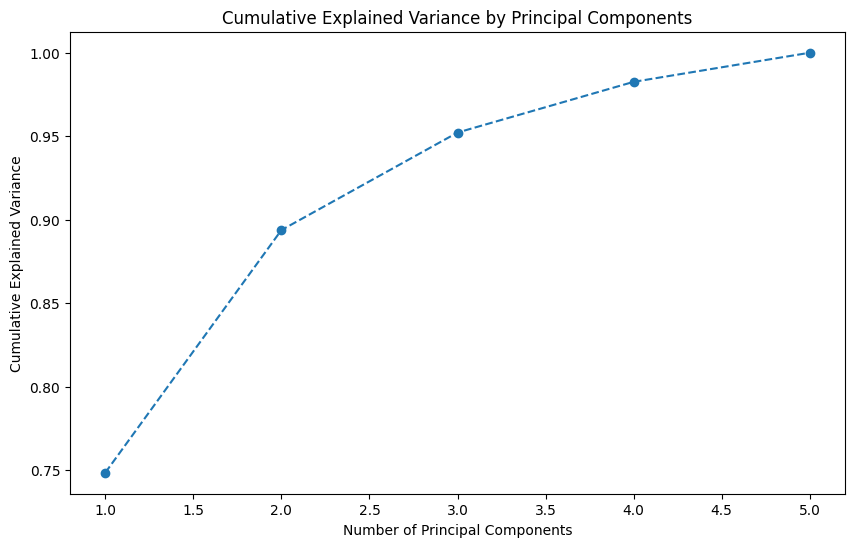

In [14]:
# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()


In [15]:
# Select number of components that explain 90% variance
n_components = np.argmax(cumulative_explained_variance >= 0.90) + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [16]:
# Get the loadings of the principal components
loadings = pca.components_

# Create a dataframe of the loadings
loadings_df = pd.DataFrame(loadings.T, index=features, columns=[f'PC{i+1}' for i in range(n_components)])

# Display the loadings
print(loadings_df)

               PC1     PC2     PC3
1_d_returns 0.3688 -0.7471  0.5288
2_d_returns 0.4553 -0.3160 -0.5826
3_d_returns 0.4816  0.0992 -0.4032
4_d_returns 0.4749  0.3576  0.1370
5_d_returns 0.4464  0.4521  0.4467


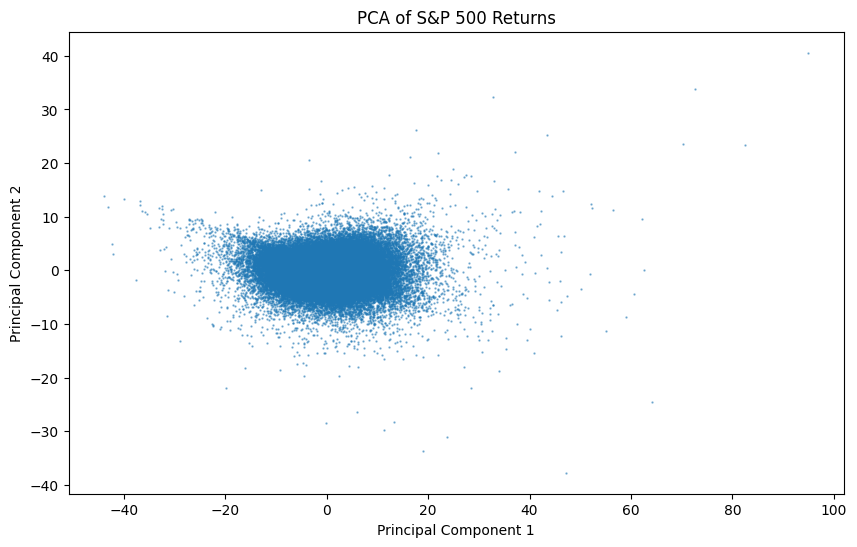

In [18]:
# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of S&P 500 Returns')
plt.show()


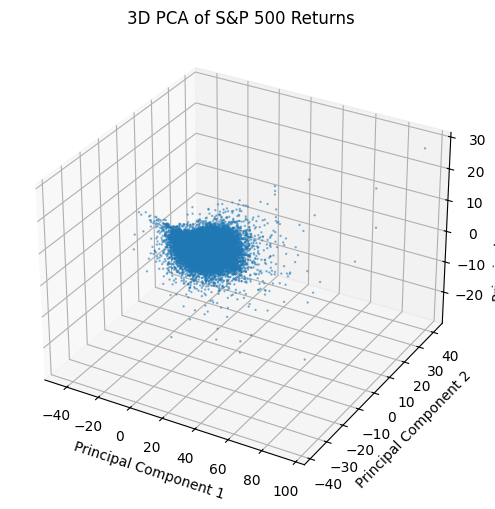

In [20]:
# 3D Scatter plot of the first three principal components
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.5, s=0.5)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of S&P 500 Returns')

plt.show()

### Combining PCA and KMeans

In [22]:
# Example: Clustering on PCA-reduced data
from sklearn.cluster import KMeans

# Initialize K-means algorithm
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit K-means to the PCA-reduced data
kmeans.fit(X_pca)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataframe
total_returns['Cluster'] = cluster_labels

# Analyze the characteristics of each cluster
cluster_stats = total_returns.groupby('Cluster').mean()

# Display cluster characteristics
print(cluster_stats)

C:\Users\cramk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



         F_1_d_returns  1_d_returns  2_d_returns  3_d_returns  4_d_returns  \
Cluster                                                                      
0               0.0009      -0.0129      -0.0230      -0.0300      -0.0343   
1               0.0003       0.0157       0.0282       0.0376       0.0438   
2               0.0045      -0.0506      -0.0832      -0.1046      -0.1174   
3               0.0006       0.0014       0.0024       0.0032       0.0041   
4              -0.0007       0.0580       0.1018       0.1306       0.1458   

         5_d_returns  6_d_returns  7_d_returns  8_d_returns  9_d_returns  \
Cluster                                                                    
0            -0.0358      -0.0346      -0.0336      -0.0327      -0.0319   
1             0.0467       0.0465       0.0463       0.0464       0.0465   
2            -0.1230      -0.1228      -0.1220      -0.1222      -0.1231   
3             0.0050       0.0060       0.0071       0.0081       0.0091 

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Extracting features
features = ['1_d_returns', '2_d_returns', '3_d_returns', '4_d_returns', '5_d_returns']
X = total_returns[features].values

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=3)  # Choosing to reduce to 3 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Creating a DataFrame for PCA components
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

# Adding the target variable back for reference
pca_df['F_1_d_returns'] = total_returns['F_1_d_returns'].values

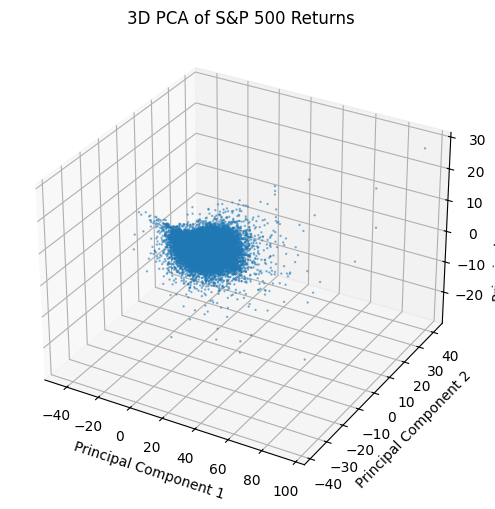

In [27]:
# 3D Scatter plot of the first three principal components
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.5, s=0.5)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of S&P 500 Returns')

plt.show()

In [28]:
from sklearn.cluster import KMeans

# Initialize K-means algorithm with a predefined number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit K-means to the PCA-reduced data
kmeans.fit(X_pca)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = cluster_labels


C:\Users\cramk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# 3D Scatter plot to visualize clusters
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df['PC1'], 
    pca_df['PC2'], 
    pca_df['PC3'], 
    c=pca_df['Cluster'],  # Color coding by cluster labels
    cmap='viridis', 
    alpha=0.5
)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA with K-means Clustering of S&P 500 Returns')

plt.colorbar(scatter, ax=ax)
plt.show()

In [ ]:
# Adding the original target variable for reference
pca_df['F_1_d_returns'] = total_returns['F_1_d_returns']

# Analyzing the characteristics of each cluster
cluster_stats = pca_df.groupby('Cluster').mean()

# Displaying cluster characteristics
print(cluster_stats)
